In [297]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [299]:
# Data manual entry
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.1, 4.2, 5.9, 8.0, 10.2, 12.1, 14.0, 16.3, 17.8, 20.1])

In [301]:
# Data using .csv file
#df = pd.read_csv('Salary_Data.csv')
#x = df['YearsExperience']
#y = df['Salary']

In [303]:
n = len(x)
sum_xi = np.sum(x)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
sum_xi_yi = sum_xi*sum_yi
sum_xi_sqr = np.sum(x**2)

In [305]:
# m slope finding

def m_slope(x,y):
    m = (n*sum_xiyi-sum_xi_yi)/(n*sum_xi_sqr-sum_xi**2)
    return m

In [307]:
m = m_slope(x,y)
m

1.9945454545454557

In [309]:
# b intercept finding

def b_intercept(x,y,m):
    b = (sum_yi-m*sum_xi)/n
    return b

In [311]:
b = b_intercept(x,y,m)
b

0.0999999999999929

In [313]:
# Prediction using the equaltion y =mx+b

def linear_regression(x,m,b):
    y = m*x+b
    return y

In [315]:
prediction = linear_regression(x,m,b)
prediction

array([ 2.09454545,  4.08909091,  6.08363636,  8.07818182, 10.07272727,
       12.06727273, 14.06181818, 16.05636364, 18.05090909, 20.04545455])

In [317]:
# Cost Function

def cost_function(x,y,prediction):
    #prediction = linear_regression(x,y,m,b)
    mse = 1/n*(np.sum((prediction-y)**2))
    return mse


In [319]:
cf = cost_function(x,y,prediction)
cf

0.019854545454545458

In [321]:
# compute the gradient

def gradient_compute(b,m,x,y):
    n = len(x)
    prediction = linear_regression(x,m,b)
    error = prediction-y
    gradient_b = (2/n)*np.sum(error)
    gradient_m = (2/n)*np.sum(error*x)
    return gradient_b,gradient_m

In [323]:
gradient_b,gradient_m = gradient_compute(b,m,x,y)
gradient_b,gradient_m

(-2.220446049250313e-15, 5.417888360170764e-15)

In [325]:
# Gradient Descent

def gradient_descent(x,y,learning_rating=0.01,iterations=200):
    b, m = 0, 0 #Initialize parameters
    cost_history = []
    b_history = [b]
    m_history = [m]
    for _ in range(iterations):
        grad_b,grad_m = gradient_compute(b,m,x,y)
        b -= learning_rating * grad_b
        m -= learning_rating * grad_m
        cost = cost_function(x,y,prediction)
        cost_history.append(cost)
        b_history.append(b)
        m_history.append(m)
    return b,m,cost_history,b_history,m_history

In [327]:
# Performance Metrics
def compute_metrics(b,m,x,y):
    predictions = linear_regression(x,m,b)
    mse = np.mean((prediction-y)**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(predictions-y))
    ss_tot = np.sum((y-np.mean(y))**2)
    ss_res = np.sum((y-predictions)**2)
    r2 = 1-(ss_res/ss_tot)
    adjusted_r2 = 1-(1-r2)*(len(x)-1)/(len(x)-2)
    return mse,rmse,mae,r2, adjusted_r2

In [329]:
b,m,cost_history,b_history,m_history = gradient_descent(x,y,learning_rating=0.01,iterations=200)
mse,rmse,mae,r2,adjusted_r2 = compute_metrics(b,m,x,y)
print(f"Optimal b: {b:.4f}, m: {m:.4f}")
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}, Adjusted_R2: {adjusted_r2}")

Optimal b: 0.1788, m: 1.9832
MSE: 0.0199, RMSE: 0.1409, MAE: 0.1217, R²: 0.9994, Adjusted_R2: 0.9992743118695829


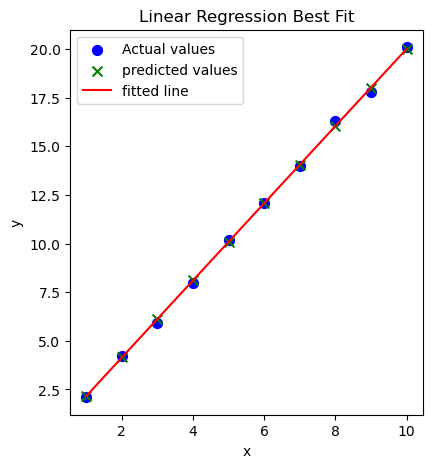

In [339]:
#plot Best fit line for linear regression

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.scatter(x, y, color='blue', label='Actual values', s=50)
plt.scatter(x,linear_regression(x,m,b), color='green', label='predicted values', s=50, marker='x')
plt.plot(x,linear_regression(x,m,b), color='red', label='fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Best Fit')
plt.legend()

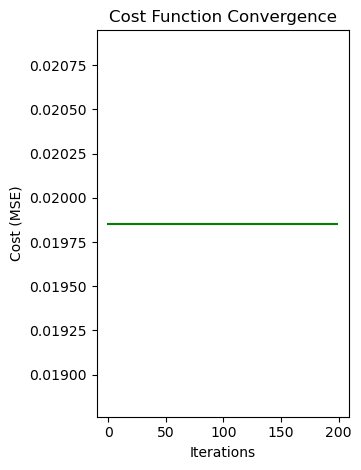

In [333]:
#Cost Function vs convergence

plt.subplot(1,2,2)
plt.plot(range(200), cost_history, color='green')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Convergence')
plt.tight_layout()
plt.show()

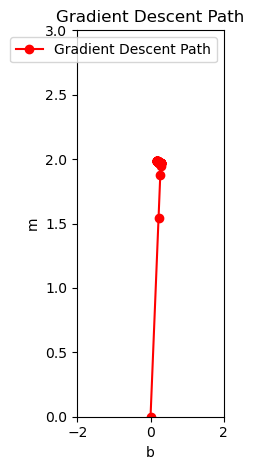

In [335]:
#plot Contour plot with gradient descent 

b_values = np.linspace(-2, 2, 100)
m_values = np.linspace(0, 3,100)
b_grid, m_grid = np.meshgrid(b_values, m_values)
cost_values = np.array([[cost_function(x,y,prediction) for b_ in b_values] for m_ in m_values])

plt.subplot(1,3,3)
plt.contour(b_grid, m_grid, cost_values, levels=20, cmap='viridis')
plt.plot(b_history, m_history, 'ro-', label='Gradient Descent Path')
plt.xlabel('b')
plt.ylabel('m')
plt.title('Gradient Descent Path')
plt.legend()
plt.tight_layout()
plt.show()